# Creating and Backtesting SMA Strategies

## Getting the Data

In [1248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [1249]:
symbol = "SPY"

In [1250]:
start = "2024-01-01"
end = "2024-6-19"
interval = "1h"

In [1251]:
df = yf.download(tickers = symbol, start = start, end = end, interval=interval)

[*********************100%%**********************]  1 of 1 completed


In [1252]:
df.to_csv("SPY.csv")

In [1253]:
#df = pd.read_csv("SPY.csv", parse_dates = ["Date"], index_col = "Date")

In [1254]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-02 09:30:00-05:00,472.540009,472.799988,471.359985,471.760010,471.760010,19608168
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269
...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428


In [1255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 819 entries, 2024-01-02 09:30:00-05:00 to 2024-06-18 15:30:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       819 non-null    float64
 1   High       819 non-null    float64
 2   Low        819 non-null    float64
 3   Close      819 non-null    float64
 4   Adj Close  819 non-null    float64
 5   Volume     819 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.8 KB


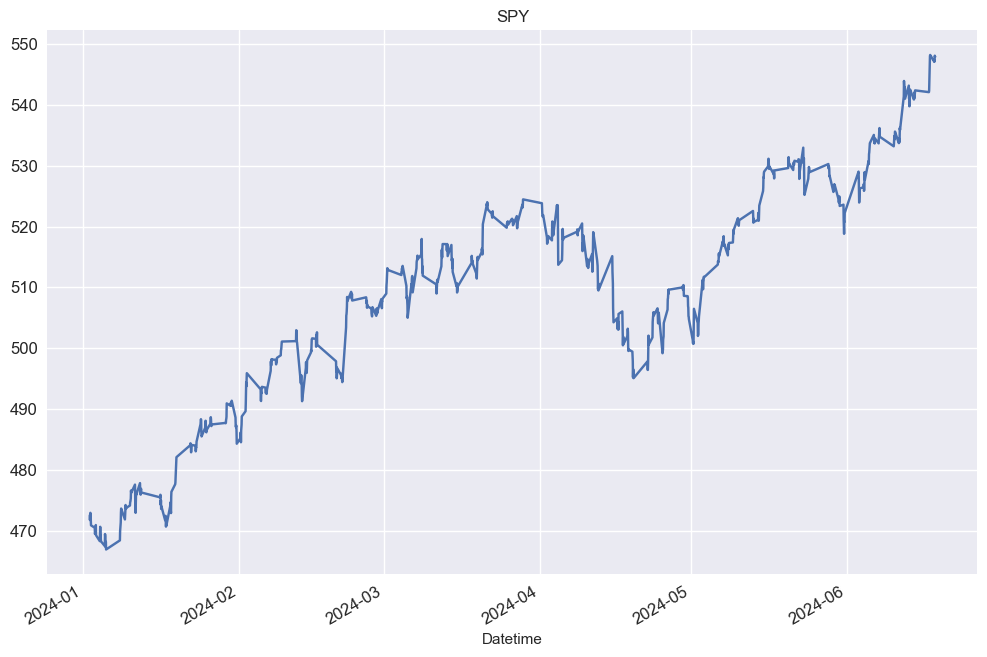

In [1256]:
df.Open.plot(figsize = (12, 8), title = "SPY", fontsize = 12)
plt.show()

In [1257]:
log_returns = np.log(df['Close'] / df['Close'].shift(1))


# Assign the calculated returns to a new column 'returns'
df['returns'] = log_returns


In [1258]:
df

,Open,High,Low,Close,Adj Close,Volume,returns
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,472.540009,472.799988,471.359985,471.760010,471.760010,19608168,NaN
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652
...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595


## A simple Buy and Hold "Strategy"

In [1259]:
df.dropna(inplace = True)

In [1260]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,returns
Datetime,,,,,,,
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595
2024-06-18 14:30:00-04:00,547.880127,548.070007,547.419983,547.885010,547.885010,4516047,0.000258
2024-06-18 15:30:00-04:00,547.900024,548.500000,547.690002,548.489990,548.489990,8772697,0.001104


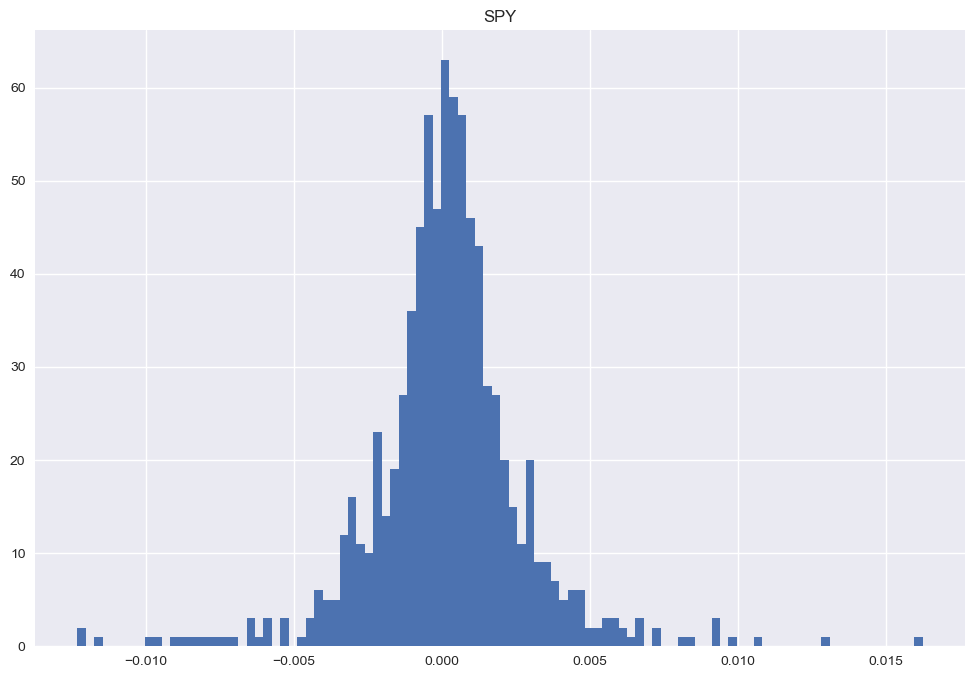

In [1261]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("SPY")
plt.show()

In [1262]:
df.returns.sum()

0.15069862781130208

In [1263]:
np.exp(df.returns.sum())

1.1626462160429203

In [1264]:
df.Close.iloc[-1] / df.Close.iloc[0]

1.1612432109483632

In [1265]:
df.returns.cumsum().apply(np.exp)

Datetime
2024-01-02 10:30:00-05:00    1.001208
2024-01-02 11:30:00-05:00    1.002575
2024-01-02 12:30:00-05:00    1.001909
2024-01-02 13:30:00-05:00    1.000255
2024-01-02 14:30:00-05:00    0.998198
                               ...   
2024-06-18 11:30:00-04:00    1.160272
2024-06-18 12:30:00-04:00    1.161756
2024-06-18 13:30:00-04:00    1.161064
2024-06-18 14:30:00-04:00    1.161364
2024-06-18 15:30:00-04:00    1.162646
Name: returns, Length: 818, dtype: float64

In [1266]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [1267]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns
Datetime,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198
...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064


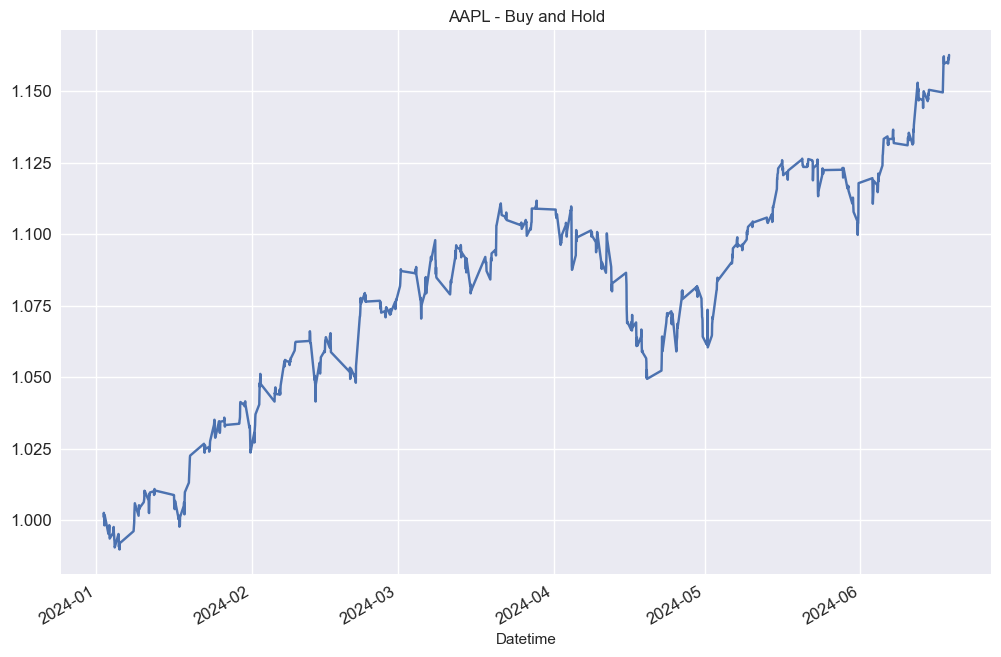

In [1268]:
df.creturns.plot(figsize = (12, 8), title = "AAPL - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [1269]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns
Datetime,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198
...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064


In [1270]:
df.creturns.iloc[-1] # absolute Performance 

1.1626462160429203

In [1271]:
df.returns.sum() # absolute Performance

0.15069862781130208

In [1272]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,returns,creturns
count,818.000000,818.000000,818.000000,818.000000,818.000000,8.180000e+02,818.000000,818.000000
mean,508.618242,509.336206,507.819986,508.653467,508.653467,8.160653e+06,0.000184,1.078204
std,18.728304,18.681675,18.737178,18.726048,18.726048,4.237271e+06,0.002626,0.039694
min,466.929993,467.899994,466.429993,466.929993,466.929993,1.639935e+06,-0.012307,0.989762
25%,496.825005,497.978752,495.753746,496.973763,496.973763,5.223850e+06,-0.000941,1.053446
50%,510.690002,511.451752,509.649994,510.760010,510.760010,7.178049e+06,0.000187,1.082669
75%,521.286240,521.831268,520.765274,521.140015,521.140015,1.021539e+07,0.001341,1.104672
max,548.190002,548.619995,547.690002,548.489990,548.489990,3.200312e+07,0.016259,1.162646


__annualized mean return and risk__

In [1273]:
df.returns.mean() * 252 # mean return

0.046425494142357124

In [1274]:
df.returns.std() * np.sqrt(252) # risk

0.04168511081081424

__maximum drawdown__

In [1275]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns
Datetime,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198
...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064


In [1276]:
df["cummax"] = df.creturns.cummax()

In [1277]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns,cummax
Datetime,,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909,1.002575
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255,1.002575
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198,1.002575
...,...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272,1.162180
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756,1.162180
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064,1.162180


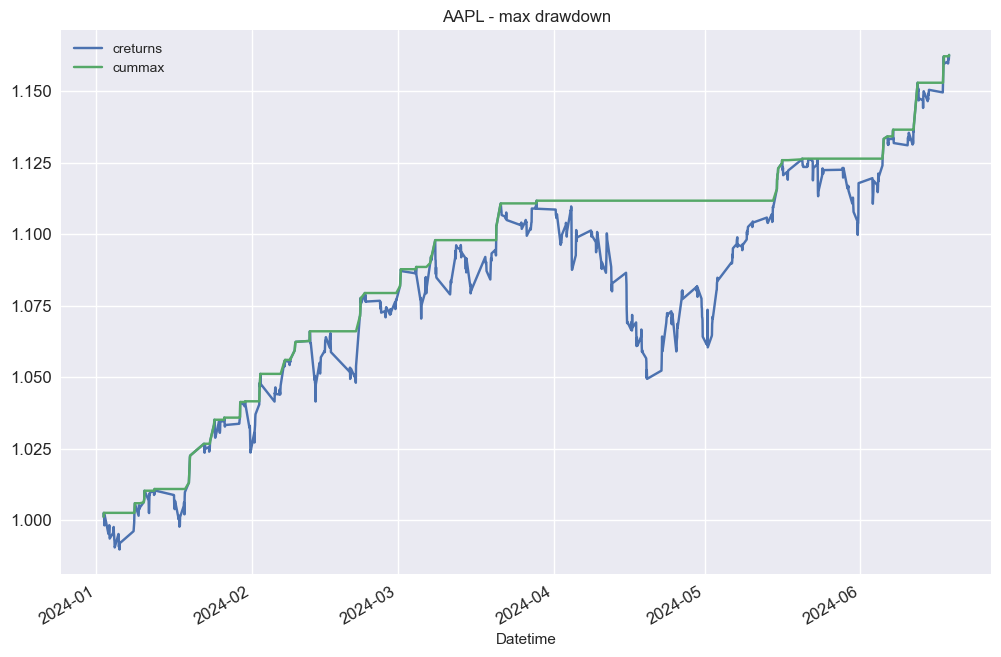

In [1278]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "AAPL - max drawdown", fontsize = 12)
plt.show()

In [1279]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Datetime
2024-01-02 10:30:00-05:00    0.000000
2024-01-02 11:30:00-05:00    0.000000
2024-01-02 12:30:00-05:00    0.000667
2024-01-02 13:30:00-05:00    0.002321
2024-01-02 14:30:00-05:00    0.004377
                               ...   
2024-06-18 11:30:00-04:00    0.001908
2024-06-18 12:30:00-04:00    0.000424
2024-06-18 13:30:00-04:00    0.001115
2024-06-18 14:30:00-04:00    0.000816
2024-06-18 15:30:00-04:00    0.000000
Length: 818, dtype: float64

In [1280]:
drawdown.max() # maximum drawdown

0.062273233491812796

In [1281]:
drawdown.idxmax()

Timestamp('2024-04-19 14:30:00-0400', tz='America/New_York')

## Defining an SMA Crossover Strategy

In [1282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [1283]:
 #pd.read_csv("SPY.csv", parse_dates = ["Date"], index_col = "Date")
sub_df = df[['Open', 'Close']].copy()

In [1284]:
sub_df


,Open,Close
Datetime,,
2024-01-02 10:30:00-05:00,471.769989,472.329987
2024-01-02 11:30:00-05:00,472.320007,472.975006
2024-01-02 12:30:00-05:00,472.954987,472.660492
2024-01-02 13:30:00-05:00,472.660004,471.880096
2024-01-02 14:30:00-05:00,471.859985,470.910004
...,...,...
2024-06-18 11:30:00-04:00,547.059998,547.369995
2024-06-18 12:30:00-04:00,547.252319,548.070007
2024-06-18 13:30:00-04:00,548.070007,547.743774


In [1285]:
sma_s = 3
sma_l = 16

In [1286]:
sub_df.Close.rolling(50).mean()

Datetime
2024-01-02 10:30:00-05:00           NaN
2024-01-02 11:30:00-05:00           NaN
2024-01-02 12:30:00-05:00           NaN
2024-01-02 13:30:00-05:00           NaN
2024-01-02 14:30:00-05:00           NaN
                                ...    
2024-06-18 11:30:00-04:00    540.147260
2024-06-18 12:30:00-04:00    540.390461
2024-06-18 13:30:00-04:00    540.621935
2024-06-18 14:30:00-04:00    540.885835
2024-06-18 15:30:00-04:00    541.161035
Name: Close, Length: 818, dtype: float64

In [1287]:
sub_df["SMA_S"] = sub_df.Open.rolling(sma_s).mean()

In [1288]:
sub_df["SMA_L"] = sub_df.Open.rolling(sma_l).mean()

In [1289]:
sub_df

,Open,Close,SMA_S,SMA_L
Datetime,,,,
2024-01-02 10:30:00-05:00,471.769989,472.329987,NaN,NaN
2024-01-02 11:30:00-05:00,472.320007,472.975006,NaN,NaN
2024-01-02 12:30:00-05:00,472.954987,472.660492,472.348328,NaN
2024-01-02 13:30:00-05:00,472.660004,471.880096,472.644999,NaN
2024-01-02 14:30:00-05:00,471.859985,470.910004,472.491659,NaN
...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,547.369995,547.211650,544.225624
2024-06-18 12:30:00-04:00,547.252319,548.070007,547.242432,544.623894
2024-06-18 13:30:00-04:00,548.070007,547.743774,547.460775,545.037018


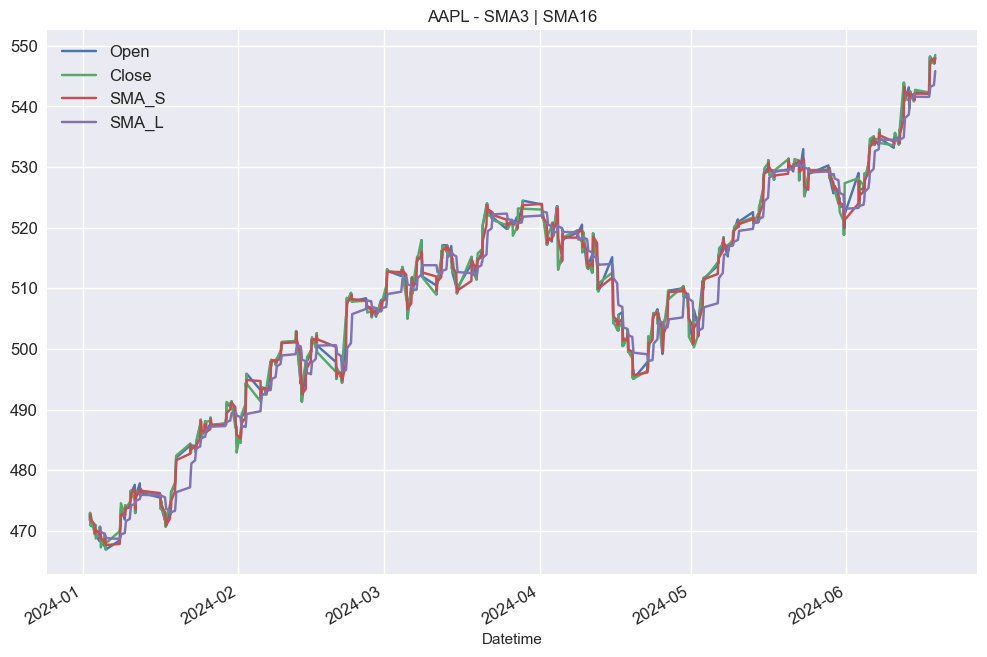

In [1290]:
sub_df.plot(figsize = (12, 8), title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [1291]:
sub_df.dropna(inplace = True)

In [1292]:
sub_df

,Open,Close,SMA_S,SMA_L
Datetime,,,,
2024-01-04 11:30:00-05:00,470.660004,469.609985,469.573334,470.689060
2024-01-04 12:30:00-05:00,469.608795,469.320099,470.009603,470.553986
2024-01-04 13:30:00-05:00,469.329987,468.579895,469.866262,470.367109
2024-01-04 14:30:00-05:00,468.570007,468.269012,469.169596,470.093048
2024-01-04 15:30:00-05:00,468.260010,467.269989,468.720001,469.818048
...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,547.369995,547.211650,544.225624
2024-06-18 12:30:00-04:00,547.252319,548.070007,547.242432,544.623894
2024-06-18 13:30:00-04:00,548.070007,547.743774,547.460775,545.037018


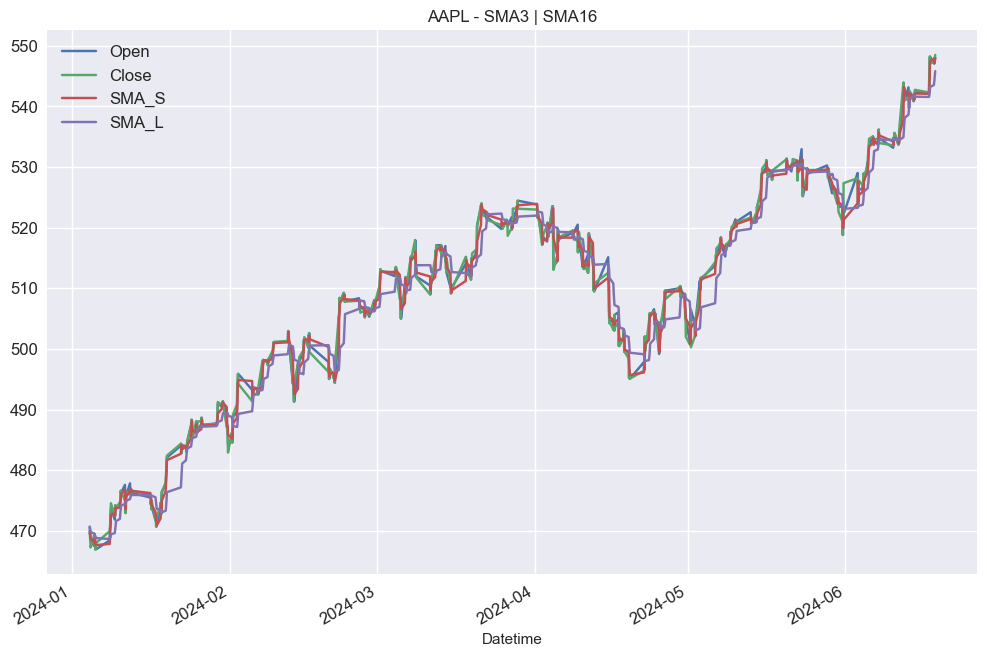

In [1293]:
sub_df.loc["2024"].plot(figsize = (12, 8), title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [1294]:
sub_df["position"] = np.where(sub_df["SMA_S"] < sub_df["SMA_L"], -1, 1)


<Axes: xlabel='Datetime'>

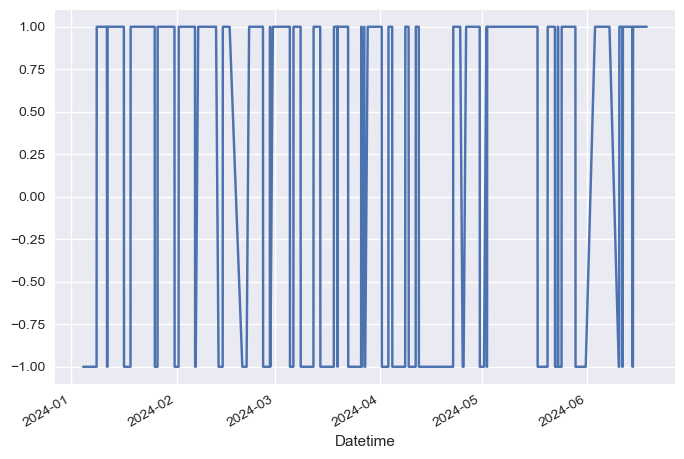

In [1295]:
sub_df["position"].plot()

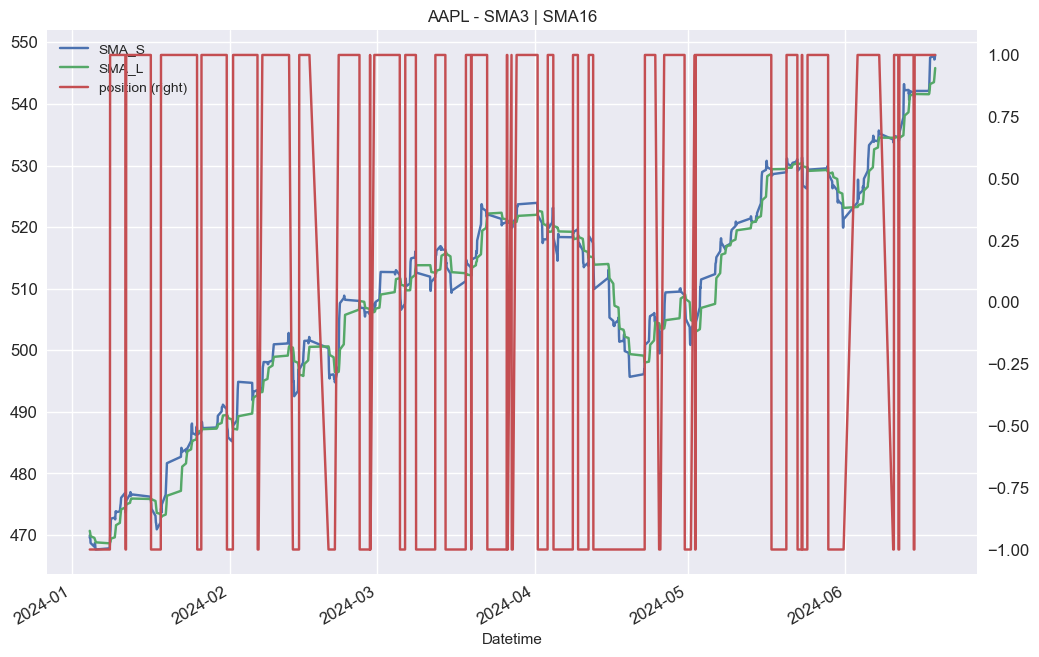

In [1296]:
sub_df.loc["2024", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "AAPL - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

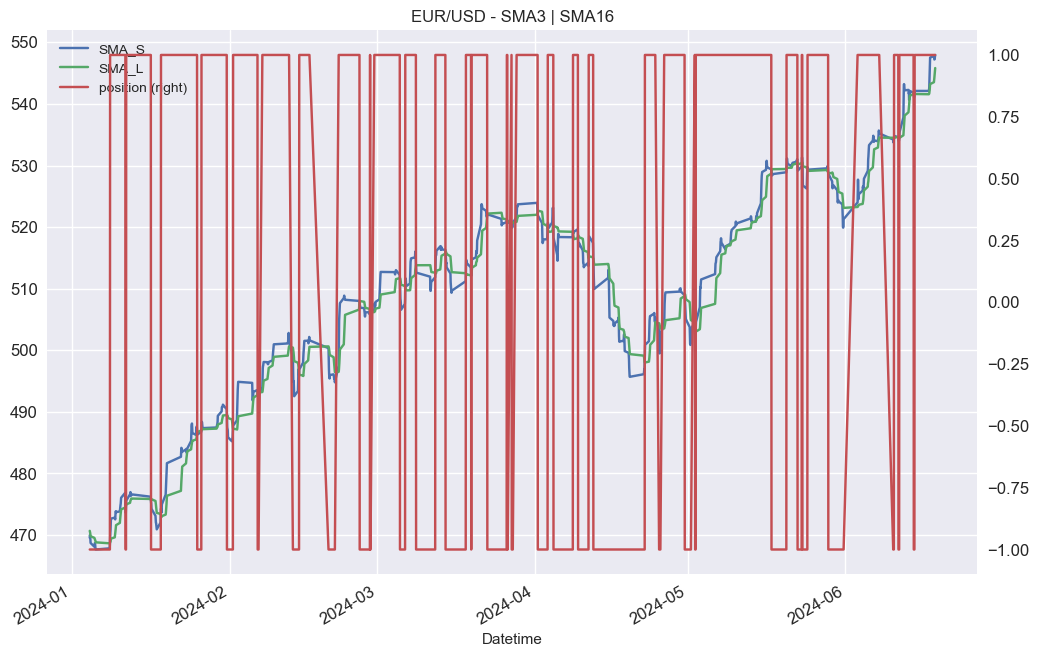

In [1297]:
sub_df.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [1298]:
sub_df

,Open,Close,SMA_S,SMA_L,position
Datetime,,,,,
2024-01-04 11:30:00-05:00,470.660004,469.609985,469.573334,470.689060,-1
2024-01-04 12:30:00-05:00,469.608795,469.320099,470.009603,470.553986,-1
2024-01-04 13:30:00-05:00,469.329987,468.579895,469.866262,470.367109,-1
2024-01-04 14:30:00-05:00,468.570007,468.269012,469.169596,470.093048,-1
2024-01-04 15:30:00-05:00,468.260010,467.269989,468.720001,469.818048,-1
...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,547.369995,547.211650,544.225624,1
2024-06-18 12:30:00-04:00,547.252319,548.070007,547.242432,544.623894,1
2024-06-18 13:30:00-04:00,548.070007,547.743774,547.460775,545.037018,1


In [1299]:
sub_df["returns"] = sub_df.Open.pct_change()

<Axes: xlabel='Datetime'>

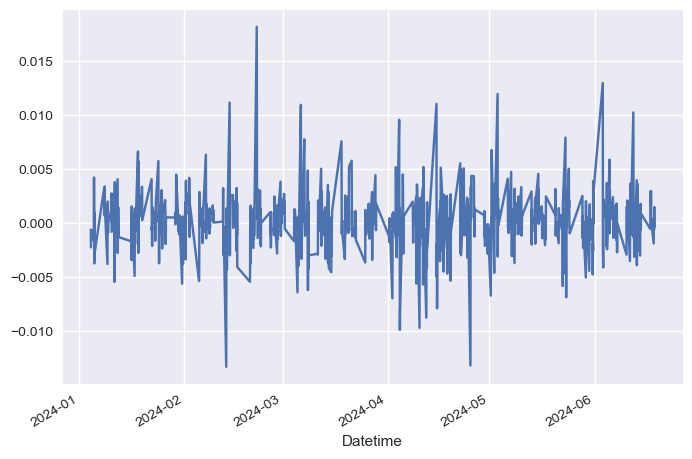

In [1300]:
sub_df["returns"].plot()

In [1301]:
sub_df["returns"] = np.log(sub_df.Open.div(sub_df.Open.shift(1)))

<Axes: xlabel='Datetime'>

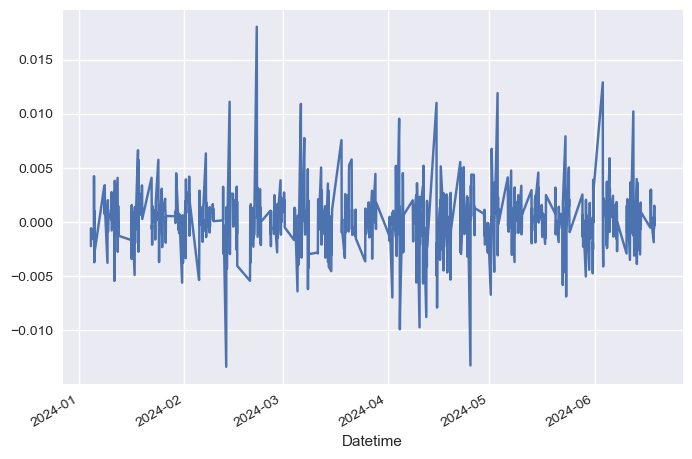

In [1302]:
sub_df["returns"].plot()

In [1303]:
sub_df["strategy"] =  (sub_df.position.shift(-1) * sub_df["returns"])

<Axes: xlabel='Datetime'>

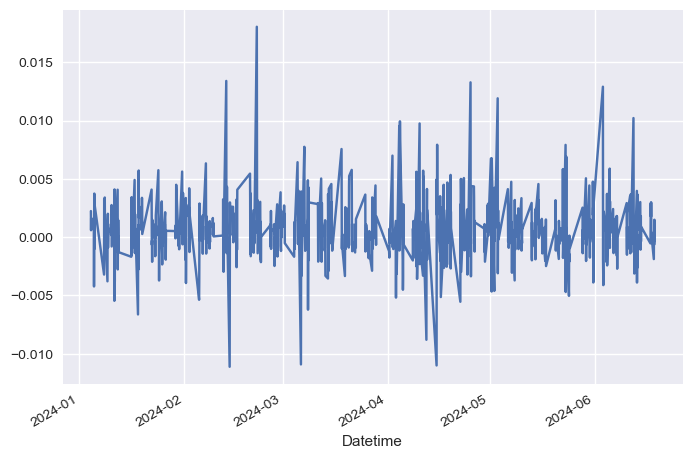

In [1304]:
sub_df["strategy"].plot()

In [1305]:
sub_df

,Open,Close,SMA_S,SMA_L,position,returns,strategy
Datetime,,,,,,,
2024-01-04 11:30:00-05:00,470.660004,469.609985,469.573334,470.689060,-1,NaN,NaN
2024-01-04 12:30:00-05:00,469.608795,469.320099,470.009603,470.553986,-1,-0.002236,0.002236
2024-01-04 13:30:00-05:00,469.329987,468.579895,469.866262,470.367109,-1,-0.000594,0.000594
2024-01-04 14:30:00-05:00,468.570007,468.269012,469.169596,470.093048,-1,-0.001621,0.001621
2024-01-04 15:30:00-05:00,468.260010,467.269989,468.720001,469.818048,-1,-0.000662,0.000662
...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,547.369995,547.211650,544.225624,1,-0.000649,-0.000649
2024-06-18 12:30:00-04:00,547.252319,548.070007,547.242432,544.623894,1,0.000351,0.000351
2024-06-18 13:30:00-04:00,548.070007,547.743774,547.460775,545.037018,1,0.001493,0.001493


In [1306]:
sub_df.dropna(inplace = True)

In [1307]:
sub_df[["returns", "strategy"]].sum() # absolute performance

returns     0.151921
strategy    0.514463
dtype: float64

In [1308]:
sub_df[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     1.164068
strategy    1.672740
dtype: float64

In [1309]:
sub_df[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.047795
strategy    0.161853
dtype: float64

In [1310]:
sub_df[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.042641
strategy    0.041512
dtype: float64

In [1311]:
sub_df["creturns"] = sub_df["returns"].cumsum().apply(np.exp)
sub_df["cstrategy"] = sub_df["strategy"].cumsum().apply(np.exp)

In [1312]:
sub_df["creturns"] = (sub_df["returns"] + 1).cumprod()
sub_df["cstrategy"] = (sub_df["strategy"] + 1).cumprod()

In [1313]:
sub_df.head(50)

,Open,Close,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Datetime,,,,,,,,,
2024-01-04 12:30:00-05:00,469.608795,469.320099,470.009603,470.553986,-1,-0.002236,0.002236,0.997764,1.002236
2024-01-04 13:30:00-05:00,469.329987,468.579895,469.866262,470.367109,-1,-0.000594,0.000594,0.997171,1.002831
2024-01-04 14:30:00-05:00,468.570007,468.269012,469.169596,470.093048,-1,-0.001621,0.001621,0.995555,1.004456
2024-01-04 15:30:00-05:00,468.260010,467.269989,468.720001,469.818048,-1,-0.000662,0.000662,0.994897,1.005121
2024-01-05 09:30:00-05:00,467.489990,469.489990,468.106669,469.544924,-1,-0.001646,0.001646,0.993259,1.006775
2024-01-05 10:30:00-05:00,469.470001,469.122009,468.406667,469.455236,-1,0.004226,-0.004226,0.997457,1.002520
2024-01-05 11:30:00-05:00,469.130005,467.380310,468.696665,469.369612,-1,-0.000724,0.000724,0.996735,1.003247
2024-01-05 12:30:00-05:00,467.380005,467.859985,468.660004,469.237738,-1,-0.003737,0.003737,0.993009,1.006996
2024-01-05 13:30:00-05:00,467.850098,468.209991,468.120036,469.122118,-1,0.001005,-0.001005,0.994008,1.005984


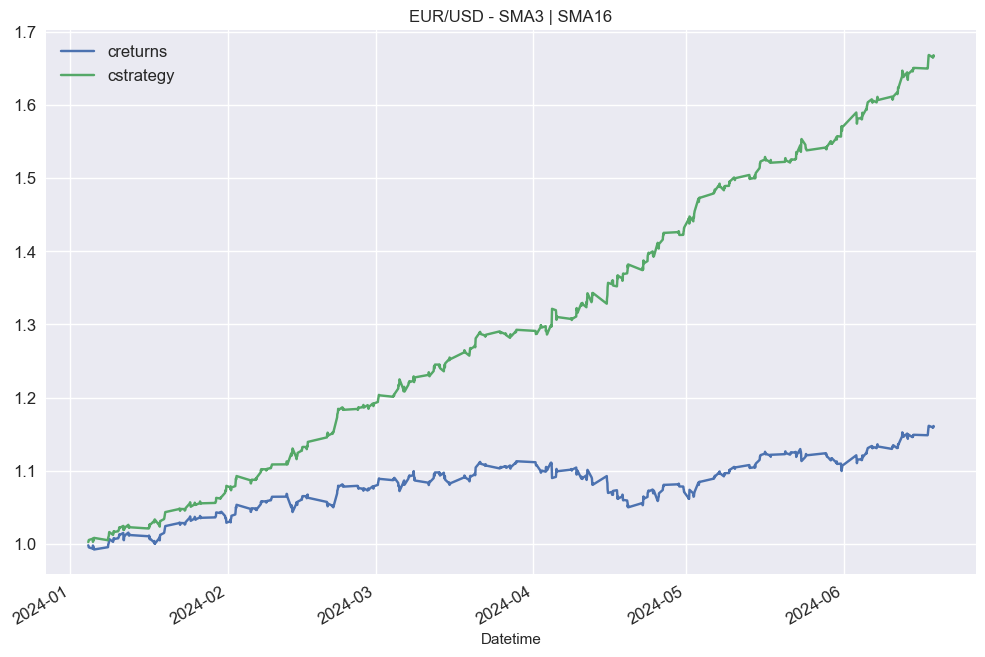

In [1314]:
sub_df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

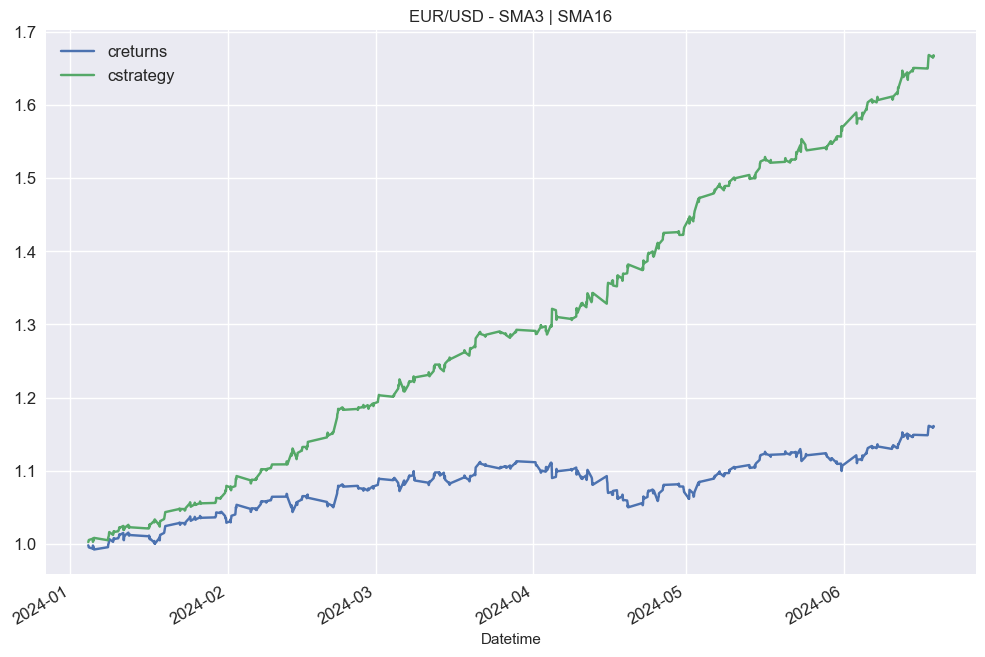

In [1315]:
sub_df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [1316]:
outperf = sub_df.cstrategy.iloc[-1] - sub_df.creturns.iloc[-1]
outperf

0.5072079423073732

In [1317]:
sub_df.head(30)


,Open,Close,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Datetime,,,,,,,,,
2024-01-04 12:30:00-05:00,469.608795,469.320099,470.009603,470.553986,-1,-0.002236,0.002236,0.997764,1.002236
2024-01-04 13:30:00-05:00,469.329987,468.579895,469.866262,470.367109,-1,-0.000594,0.000594,0.997171,1.002831
2024-01-04 14:30:00-05:00,468.570007,468.269012,469.169596,470.093048,-1,-0.001621,0.001621,0.995555,1.004456
2024-01-04 15:30:00-05:00,468.260010,467.269989,468.720001,469.818048,-1,-0.000662,0.000662,0.994897,1.005121
2024-01-05 09:30:00-05:00,467.489990,469.489990,468.106669,469.544924,-1,-0.001646,0.001646,0.993259,1.006775
2024-01-05 10:30:00-05:00,469.470001,469.122009,468.406667,469.455236,-1,0.004226,-0.004226,0.997457,1.002520
2024-01-05 11:30:00-05:00,469.130005,467.380310,468.696665,469.369612,-1,-0.000724,0.000724,0.996735,1.003247
2024-01-05 12:30:00-05:00,467.380005,467.859985,468.660004,469.237738,-1,-0.003737,0.003737,0.993009,1.006996
2024-01-05 13:30:00-05:00,467.850098,468.209991,468.120036,469.122118,-1,0.001005,-0.001005,0.994008,1.005984


## Finding the optimal SMA Strategy

In [1318]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns,cummax
Datetime,,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909,1.002575
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255,1.002575
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198,1.002575
...,...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272,1.162180
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756,1.162180
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064,1.162180


In [1319]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,creturns,cummax
Datetime,,,,,,,,,
2024-01-02 10:30:00-05:00,471.769989,472.450012,471.299988,472.329987,472.329987,9085308,0.001207,1.001208,1.001208
2024-01-02 11:30:00-05:00,472.320007,473.359985,472.269989,472.975006,472.975006,9373953,0.001365,1.002575,1.002575
2024-01-02 12:30:00-05:00,472.954987,473.670013,472.279999,472.660492,472.660492,7394613,-0.000665,1.001909,1.002575
2024-01-02 13:30:00-05:00,472.660004,472.959686,471.545013,471.880096,471.880096,9946269,-0.001652,1.000255,1.002575
2024-01-02 14:30:00-05:00,471.859985,472.059998,470.489990,470.910004,470.910004,13662376,-0.002058,0.998198,1.002575
...,...,...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,547.059998,548.070007,546.969971,547.369995,547.369995,3919928,0.000530,1.160272,1.162180
2024-06-18 12:30:00-04:00,547.252319,548.169983,547.229980,548.070007,548.070007,2432417,0.001278,1.161756,1.162180
2024-06-18 13:30:00-04:00,548.070007,548.619995,547.090027,547.743774,547.743774,5162428,-0.000595,1.161064,1.162180


In [1320]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [1321]:
run_strategy((50, 200))

AttributeError: 'DataFrame' object has no attribute 'price'

In [ ]:
run_strategy((10, 50))

In [ ]:
run_strategy((22, 252))

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [ ]:
-run_strategy((46, 137))

## Trades and Transaction Costs (Part 1)

In [ ]:
data # sma 50/200 strategy

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.position.diff().fillna(0).abs()

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

In [ ]:
data.trades.value_counts()

## Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [ ]:
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [ ]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread * 100000

In [ ]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

In [ ]:
ptc = 0.00007

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()